# CAPSTONE PROJECT SUBMISSION

* Student name: Gabriel Araujo
* Student pace: part time
* Scheduled project review date/time: 
* Instructor name: Amber Yandow
* Blog post URL: 

# TABLE OF CONTENTS

*Click to jump to matching Markdown Header.*<br><br>

<font size=3rem>
    
- **[INTRODUCTION](#INTRODUCTION)<br>**
- **[OBTAIN](#OBTAIN)**<br>
- **[SCRUB & EXPLORE](#SCRUB-&-EXPLORE)**<br>
- **[MODEL](#MODEL)**<br>
- **[CONCLUSIONS & FUTURE WORK](#CONCLUSIONS-&-FUTURE-WORK)<br>**
</font>

# INTRODUCTION

The contents of this repository detail an analysis of the Flatiron Data Science Capstone project. This analysis is detailed in hopes of making the work accessible and replicable.

## Business Problem

On 18 August 2008, the domain name bitcoin.org was registered.Bitcoin is a cryptocurrency, a digital asset designed to work as a medium of exchange that uses cryptography to control its creation and management, rather than relying on central authorities. When this currency was first created, each coin was worth basically nothing. Today, a single coin is worth over $50,000.00.


**Will write something nice for the problem statement LOL** Basically this project wants to show that Bitcoin is a hype and it's value is deeply influenced by rich and important people, especially in the Bitcoin community.

## Goals

## Data

Two datasets being analyzed in this project are Bitcoin Tweets and Bitcoin Hourly Historical Data. Bitcoin Tweets dataset was extracted from Twitter using Twint. Bitcoin Hourly Historical Data was downloaded from http://www.cryptodatadownload.com/data/gemini/ 

Bitcoin Tweets dataset consists of 6 features and 33,962 unique tweets that date to the year 2008.

Bitcoin Hourly Historical dataset consists of 4 features and 47,431 price observations that date back to the year 2008.

## Method

<font size = "4"> **Analysis Framework** </font>

This project will use the OSEMN framework (outlined in brief below)

**Obtain**
 
- Scrape tweets using Twint.
- Obtain historical Bitcoin price data.

**Scrub**
 
- Remove unwanted features (id, conversation_id, timezone, etc...).
- Fill/remove null values.
- Remove stop words from corpus.
- Remove mentions, retweets, emojis, and URLs.

**Explore**

- Lemmatize/Stem Word Tokens.
- Examine outliers text.
- Create Word Cloud.
- Interactive plots.


**Model**
- Random Forests Classifier.
- Naive Bayes.
- Deep NLP.

**Interpret**
- Results.
- Recommendations and Future Work.

# OBTAIN

## Imports


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string
import itertools
import os
from PIL import Image
import warnings
import re
from textblob import TextBlob
warnings.filterwarnings('ignore')
import twint
import datetime
import nest_asyncio
from ipywidgets import interact
from collections import Counter
nest_asyncio.apply()
%matplotlib inline

#NLTK PACKAGE
import nltk
nltk.download('vader_lexicon')
from nltk import word_tokenize, regexp_tokenize
from nltk import FreqDist
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import PorterStemmer

#SKLEARN PACKAGE
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer,TfidfTransformer,CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB

#KERAS PACKAGE
import keras
import tensorflow as tf
from tensorflow.keras.layers import Input,Dense,LSTM,Embedding
from tensorflow.keras.layers import Dropout, Activation, Bidirectional, GRU
from tensorflow.keras.models import Sequential
from tensorflow.keras import initializers, regularizers, constraints, optimizers, layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import text,sequence
from tensorflow.keras.utils import to_categorical

#BOKEH PACKAGE
from bokeh.layouts import layout
from bokeh.models import HoverTool
from bokeh.plotting import figure, show

#GEMSIM PACKAGE
from gensim.utils import simple_preprocess

#WORDCLOUD PACKAGE
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

#LIME PACKAGE
from lime import lime_text
from lime.lime_text import LimeTextExplainer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Biel_\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Biel_\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Biel_\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Biel_\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw to
[nltk_data]     C:\Users\Biel_\AppData\Roaming\nltk_data...
[nltk_data]   Package omw is already up-to-date!


## Twint

Twint is an advanced Twitter scraping tool written in Python that allows for scraping Tweets from Twitter profiles without using Twitter's API. <br><br>Twint utilizes Twitter's search operators to let you scrape Tweets from specific users, scrape Tweets relating to certain topics, hashtags & trends, or sort out sensitive information from Tweets like e-mail and phone numbers. Twint also makes special queries to Twitter allowing you to also scrape a Twitter user's followers, Tweets a user has liked, and who they follow without any authentication, API, Selenium, or browser emulation.<br><br>For more information, access https://pypi.org/project/twint/.

<font size = "1">**Information taken Twint website (https://pypi.org/project/twint/).**</font>

In [2]:
#USING TWINT TO GET TWEETS MENTIONING THE WORD BITCOIN AND CRYPTOCURRENCY
#FROM INFLUENCIAL PEOPLE
# c = twint.Config()
# c.Store_csv = True
# c.Output = "tweets_3.csv"
# c.Lang = "en"
# c.Search = '(BTC OR bitcoin OR crypto OR cryptocurrency) (from:CNN OR from:FoxNews OR from:coinbase OR from:BTCTN OR from:cz_binance OR from:aplusk OR from:tyler OR from:cameron OR from:elonmusk OR from:mcuban OR from:Nouriel OR from:binance OR from:barrysilbert OR from:rogerkver OR from:brian_armstrong OR from:SatoshiLite OR from:erikvoorhees OR from:APompliano)'
# twint.run.Search(c)
# # # from:CNN OR from:FoxNews OR from:coinbase OR from:BTCTN OR from:cz_binance OR 

## Tweet Data Frame

This project will utilize a mixture of text and numerical data. The feature that will be analyzed the most is the tweet text located in the tweet column. The Date column will be used to merge the data frame with the Bitcoin Hourly Historical Dataset.

In [3]:
#IMPORTING CSV FILE
df_tweet = pd.read_csv('tweets_3.csv', low_memory=False)

#LIST COLUMNS NAMES THAT WILL BE UTILIZED
columns = ['created_at','tweet','name','replies_count','retweets_count','likes_count']

#CREATING A NEW DF WITH ONLY WANTED COLUMNS
df_tweet = df_tweet[columns]

#REPLACE SPACE WITH _ ON NAMES SO THEY ARE ALL ONE WORD
for i in range(0,len(df_tweet)):
    df_tweet['name'][i] = df_tweet['name'][i].replace(' ','_')
    
#CHANGING CREATED_AT DATA FROM STRING TO DATETIME
df_tweet['created_at'] = pd.to_datetime(df_tweet['created_at'])

#RENAMING CREATED_AT COLUMN TO DATE
df_tweet.rename(columns = {'created_at':'Date'},inplace=True)

#ROUNDING TWEET TIME TO NEAREST HOUR FOR FUTURE MERGER
df_tweet['Date'] = df_tweet['Date'].round('H')
    
#DISPLAY DF_TWEET
df_tweet

Date                                              tweet  \
0     2021-03-10 14:00:00  Three #bitcoin #ETFs have been approved in Nor...   
1     2021-03-10 13:00:00  The House to vote on $1.9 trillion dollar adve...   
2     2021-03-10 13:00:00  Going LIVE with @LMAX Group CEO @mercerdavid t...   
3     2021-03-10 13:00:00  Ternoa (CAPS), Transmit Your Memories and Priv...   
4     2021-03-10 13:00:00  #bitcoin brings scarcity to digital money. NFT...   
...                   ...                                                ...   
33957 2011-07-18 17:00:00  Ruxum: Wall Street Level Security Comes To #Bi...   
33958 2011-07-13 12:00:00  Via @nprnews: The Tuesday Podcast: #Bitcoin | ...   
33959 2011-07-04 04:00:00  ビットコインフォーラムをUPしました！ www.Bitcoin.co.jp/forum #b...   
33960 2008-08-11 09:00:00  BUSINESS: Fire On BTC Oil Pipeline Is Put Out:...   
33961 2008-08-08 09:00:00  BUSINESS: Fire Still Burning On BTC Oil Pipeli...   

                     name  replies_count  retweets_count  likes_count  
0            Bitcoin_News              8              33           98  
1        Tyler_Winklevoss             53             151         1300  
2                  Pomp_🌪             12              18           93  
3            Bitcoin_News              2               9           13  
4      Cameron_Winklevoss             72              80          645  
...                   ...            ...             ...          ...  
33957       Erik_Voorhees              0               0            1  
33958       Erik_Voorhees              0               0            0  
33959           Roger_Ver              1               0            4  
33960            Fox_News              0               0            0  
33961            Fox_News              0               0            0  

[33962 rows x 6 columns]

## Bitcoin Hourly Historical Data Frame

The hourly price change in this dataset will be used as the target for all models in this notebook.

In [4]:
#IMPORTING BITCOIN HOURLY HISTORICAL DATA
df_bitcoin = pd.read_csv('Bitcoin Hourly Historical Data.csv', low_memory=False)
df_bitcoin['log_diff'] = np.log(df_bitcoin['Close']) - np.log(df_bitcoin['Open'])
# LIST OF UNWANTED COLUMNS
drop_columns = ['Open','High','Low','Volume']

#DROPPING UNWANTED COLUMNS
df_bitcoin.drop(drop_columns, axis=1,inplace=True)

#CHANGING DATE COLUMN TO DATETIME
df_bitcoin['Date'] = pd.to_datetime(df_bitcoin['Date'])

#SETTING INDEX TO DATE COLUMN
# df_bitcoin.set_index('Date',inplace=True)

#LOOKING AT BITCOIN DATAFRAME
df_bitcoin

Date     Close  hour_change  24hr_change  log_diff
0     2021-03-07 00:00:00  49096.45        0.405        0.405  0.004062
1     2021-03-06 23:00:00  48897.43       -0.176        0.229 -0.001758
2     2021-03-06 22:00:00  48983.47        0.787        1.016  0.007904
3     2021-03-06 21:00:00  48597.81        0.017        1.033  0.000170
4     2021-03-06 20:00:00  48589.53        0.371        1.404  0.003718
...                   ...       ...          ...          ...       ...
47427 2015-10-08 18:00:00    244.00       -0.406       -0.529 -0.004049
47428 2015-10-08 17:00:00    244.99        0.302       -0.227  0.003025
47429 2015-10-08 16:00:00    244.25       -0.274       -0.378 -0.002739
47430 2015-10-08 15:00:00    244.92       -0.033       -0.411 -0.000327
47431 2015-10-08 14:00:00    245.00        0.000       -0.411  0.000000

[47432 rows x 5 columns]

# SCRUB & EXPLORE

## Tweet Data Frame

In [5]:
#LOOKING AT COLUMNS DATA TYPES
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33962 entries, 0 to 33961
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            33962 non-null  datetime64[ns]
 1   tweet           33962 non-null  object        
 2   name            33962 non-null  object        
 3   replies_count   33962 non-null  int64         
 4   retweets_count  33962 non-null  int64         
 5   likes_count     33962 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 1.6+ MB


In [6]:
df_tweet = df_tweet[df_tweet['name'] != 'Bitcoin_News']
df_tweet

Date                                              tweet  \
1     2021-03-10 13:00:00  The House to vote on $1.9 trillion dollar adve...   
2     2021-03-10 13:00:00  Going LIVE with @LMAX Group CEO @mercerdavid t...   
4     2021-03-10 13:00:00  #bitcoin brings scarcity to digital money. NFT...   
5     2021-03-10 12:00:00  The greatest technology companies and products...   
7     2021-03-10 11:00:00  The team at @BlockFi has been working their as...   
...                   ...                                                ...   
33957 2011-07-18 17:00:00  Ruxum: Wall Street Level Security Comes To #Bi...   
33958 2011-07-13 12:00:00  Via @nprnews: The Tuesday Podcast: #Bitcoin | ...   
33959 2011-07-04 04:00:00  ビットコインフォーラムをUPしました！ www.Bitcoin.co.jp/forum #b...   
33960 2008-08-11 09:00:00  BUSINESS: Fire On BTC Oil Pipeline Is Put Out:...   
33961 2008-08-08 09:00:00  BUSINESS: Fire Still Burning On BTC Oil Pipeli...   

                     name  replies_count  retweets_count  likes_count  
1        Tyler_Winklevoss             53             151         1300  
2                  Pomp_🌪             12              18           93  
4      Cameron_Winklevoss             72              80          645  
5                  Pomp_🌪             31              28          268  
7                  Pomp_🌪             56              29          359  
...                   ...            ...             ...          ...  
33957       Erik_Voorhees              0               0            1  
33958       Erik_Voorhees              0               0            0  
33959           Roger_Ver              1               0            4  
33960            Fox_News              0               0            0  
33961            Fox_News              0               0            0  

[21872 rows x 6 columns]

In [7]:
df_tweet['name'].value_counts()

Pomp_🌪                5688
Erik_Voorhees         4601
Charlie_Lee_          2046
Roger_Ver             1822
Barry_Silbert         1637
Binance               1527
Nouriel_Roubini       1176
Tyler_Winklevoss      1072
Coinbase               729
CZ_🔶_Binance           567
Cameron_Winklevoss     517
CNN                    254
Mark_Cuban             124
Brian_Armstrong         49
Elon_Musk               29
Fox_News                24
ashton_kutcher           8
Floyd_Mayweather         2
Name: name, dtype: int64

### Tweet Cleaning

The first model that will be presented in this notebook will be a Random Forest classifier that will not analyze the tweet text like an NLP model. For the first model, the input variables will be the sentiment of the tweet, name of the author,length of tweet, and the number of replies, retweets, and likes that specific tweet received. In order to achieve that, the tweets will be cleaned and analyzed throughly.<br><br>
**Preparing text data requires more processing than normal data.**
1. The following things must be removed:
    - Punctuation
    - Capitalization
    - Numbers
    
    
2. In most analyses, text needs to be **tokenzied** into a list of words and not remain in a sentence format.


3. It is always recommended to remove commonly used words that contain little information, called **Stop Words** (words like: the,was,he,she, it,etc...) from the machine learning algorithms. This is done in order to reduce the dimensionality of each corpus down to only the words that contain important information.


4. In most cases, each word token is reduced down to its root word. For cases such as "run", "runs", "running" and "ran", they are more similar than different, we may want our algorithm to treat these as the same word, "run".
<br><br>Simplifying words down to the basic core word (or word *stem*) is referred to as **"Stemming"**. <br><br><img src="https://raw.githubusercontent.com/learn-co-students/dsc-nlp-and-word-vectorization-online-ds-ft-100719/master/images/new_stemming.png" width=40%><br>A more advanced form of this also understands things like words that are just in a **different tense** such as  i.e.  **"ran", "run", "running"**. This process is called  **"lemmatization**, where the words are reduced to their simplest form, called "**lemmas**"<br><br>

    
|   Word   |  Stem | Lemma |
|:--------:|:-----:|:-----:|
|  Studies | Studi | Study |
| Studying | Study | Study |

5. Finally, we have to convert our text data into numeric form for our machine learning models to analyze, a process called **Vectorization**.<br><br>

| Document | dry | fruit | ... | intense |
|:--------:|:---:|:-----:|-----|---------|
|     1    |  0  |   3   | ... |    1    |
|     2    |  1  |   2   | ... |    0    |<br><br> 

>   - **There are several different ways we can vectorize our text:**
      - Count vectorization
      - Term Frequency-Inverse Document Frequency (TF-IDF)
      - Word Embeddings (Deep NLP)
    
    
>- **_Term Frequency_** is calculated with the following formula:
$$ \text{Term Frequency}(t) = \frac{\text{number of times it appears in a document}} {\text{total number of terms in the document}} $$ <br>
- Which can also be represented as:
$$\begin{align}
 \text{tf}_{i,j} = \dfrac{n_{i,j}}{\displaystyle \sum_k n_{i,j} }
\end{align} $$

> - **_Inverse Document Frequency_** is calculated with the following formula:
$$ IDF(t) = log_e(\frac{\text{Total Number of Documents}}{\text{Number of Documents with it in it}})$$<br>
- Which can also be represented as: 
$$\begin{align}
idf(w) = \log \dfrac{N}{df_t}
\end{align} $$

> The **_TF-IDF_** value for a given word in a given document is just found by multiplying the two!
$$ \begin{align}
w_{i,j} = tf_{i,j} \times \log \dfrac{N}{df_i} \\
tf_{i,j} = \text{number of occurences of } i \text{ in} j \\
df_i = \text{number of documents containing } i \\
N = \text{total number of documents}
\end{align} $$

<font size = "1">**Information taken from Flatiron School Natural Language Processing Section and from instructor James Irving.**</font>

A portion of proprocessing will be done prior to a proper train-test-split in this **Tweet Cleaning** section in order to extract the tweets' sentiment. In the **MODEL** section of this notebook, preprocessing will be done again for the NLP models after a proper train-test-split.

In [8]:
stopwords_list = stopwords.words('english')
stopwords_list += string.punctuation
additional_punc = ['“','”','...',"''",'’','``','bitcoin','cryptocurrency',
                   'crypto','crypto.','blockchain','one','u',"n't",'btc','via',
                   '.jp','new','amp','market','exchange','cash','people','price',
                   'time',"'s'","'s",'blank','litecoin','ltc','_io','—','binance',
                   'coinbase','_btc','bnb','ath','bitcoincash','1','like','us',
                  'crypto-currency','crypto-currencies','bitcoin.','.',"‘"]
stopwords_list += additional_punc

In [9]:
#FUNCTION TO CLEAN TWEETS
def cleantext(text):
    text = re.sub(r'@[A-Za-z0-9]+','',text) #REMOVING MENTIONS
    text = re.sub(r'#','',text) #REMOVING HASHTAGS
    text = re.sub(r'RT[\s]+','',text) #REMOVING RETWEETS
    text = re.sub(r'https?:\/\/\S+','',text) #REMOVING HTTPS LINKS
    text = re.sub(r'www.[A-Za-z0-9]+.[A-Za-z0-9]+','',text) #REMOVING WWW. LINKS
    text = re.sub(r'.jp/?[A-Za-z0-9]+.[A-Za-z0-9]+','',text) #REMOVING .JP LINKS
    return text

#FUNCTION TO REMOVE EMOJIS  AND CHINESE CHARACTERS AND SYMBOLS FROM TWEETS
def remove_emojis(text):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f" 
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', text)

#FUNCTION TO REMOVE EXTRA SPACES IN TWEETS
def strip_space(text):
    text = text.strip(' ')
    return text

#FUNCTION TO NORMALIZE CONTRACTIONS IN TWEETS
def normalize_contractions_text(text):
    """
    This function normalizes english contractions.
    """
    contractions = json.loads(open('english_contractions.json', 'r').read())
    new_token_list = []
    token_list = text.split()
    for word in token_list:
        if "’" in word:
            word = word.replace("’","'")
        first_upper = False
        
        if word[0].isupper():
            first_upper = True
            
        if word.lower() in contractions:
            replacement = contractions[word.lower()]
            
            if first_upper:
                replacement = replacement[0].upper()+replacement[1:]
                
            replacement_tokens = replacement.split()
            x = 0
            
            if len(replacement_tokens)>1:
                
                while x < len(replacement_tokens):
                    new_token_list.append(replacement_tokens[x])
                    x+=1
                
            else:
                new_token_list.append(replacement_tokens[0])
        else:
            new_token_list.append(word)
    sentence = " ".join(new_token_list).strip(" ")
    return sentence

In [10]:
#APPLYING ALL FUNCTIONS TO TWEETS
df_tweet['tweet'] = df_tweet['tweet'].apply(cleantext)
df_tweet['tweet'] = df_tweet['tweet'].apply(remove_emojis)
df_tweet['tweet'] = df_tweet['tweet'].apply(strip_space)
df_tweet['name'] = df_tweet['name'].apply(remove_emojis)

#LOOKING AT DATAFRAME WITH ALL CLEANING FUNCTIONS APPLIED
df_tweet

Date                                              tweet  \
1     2021-03-10 13:00:00  The House to vote on $1.9 trillion dollar adve...   
2     2021-03-10 13:00:00  Going LIVE with  Group CEO  to talk about inst...   
4     2021-03-10 13:00:00  bitcoin brings scarcity to digital money. NFTs...   
5     2021-03-10 12:00:00  The greatest technology companies and products...   
7     2021-03-10 11:00:00  The team at  has been working their asses off ...   
...                   ...                                                ...   
33957 2011-07-18 17:00:00  Ruxum: Wall Street Level Security Comes To Bit...   
33958 2011-07-13 12:00:00               Via : The Tuesday Podcast: Bitcoin |   
33959 2011-07-04 04:00:00                                                 UP   
33960 2008-08-11 09:00:00  BUSINESS: Fire On BTC Oil Pipeline Is Put Out:...   
33961 2008-08-08 09:00:00  BUSINESS: Fire Still Burning On BTC Oil Pipeli...   

                     name  replies_count  retweets_count  likes_count  
1        Tyler_Winklevoss             53             151         1300  
2                   Pomp_             12              18           93  
4      Cameron_Winklevoss             72              80          645  
5                   Pomp_             31              28          268  
7                   Pomp_             56              29          359  
...                   ...            ...             ...          ...  
33957       Erik_Voorhees              0               0            1  
33958       Erik_Voorhees              0               0            0  
33959           Roger_Ver              1               0            4  
33960            Fox_News              0               0            0  
33961            Fox_News              0               0            0  

[21872 rows x 6 columns]

Below, an interactive function will show all the steps of text preparation. It will output the original tweet, with only the links and emojis removed, the Normalized contractions tweet, the tokenized tweet, tokenized tweet with stopwords removed, and lastly the lemmatized/stem tokens.

In [11]:
#INTERACTIVE FUNCTION THAT COMPARES THE ORIGINAL TWEET WITH THE NORMALIZED,
#TOKENIZED,REMOVED STOP WORDS, LEMMATIZED, AND STEMMED TWEETS

@interact
def tokenize_tweet(i=(0,len(df_tweet['tweet'])-1)):
    from nltk.corpus import stopwords
        
    lemmatizer = WordNetLemmatizer()
    ps = PorterStemmer()
    
    print(f"- Tweet #{i}:\n")
    print(' Regular Tweet:\n',df_tweet['tweet'][i],'\n')
    tokens = word_tokenize(normalize_contractions_text(df_tweet['tweet'][i]))

    stopped_tokens = [w.lower() for w in tokens if w.lower() not in stopwords_list]
    lemma_tokens = [lemmatizer.lemmatize(w) for w in stopped_tokens]
    stem_tokens = [ps.stem(w) for w in stopped_tokens]
    contraction_text = normalize_contractions_text(df_tweet['tweet'][i])
    
    print(' Normalize Contractions Tweets: \n',contraction_text,end= '\n\n')
    print(' Tokenized Tweets:\n',tokens,end='\n\n')
    print(' No Stop Words Tokenized Tweets:\n',stopped_tokens, end='\n\n')
    print(' Lemmatized Tokens:\n',lemma_tokens, end='\n\n')
    print(' Stem Tokens:\n',stem_tokens,end='\n\n')    

interactive(children=(IntSlider(value=10935, description='i', max=21871), Output()), _dom_classes=('widget-int…

In [12]:
#APPLYING NORMALIZED CONTRACTIONS TO TWEET COLUMN TO MAKE IT PERMANENT 
df_tweet['tweet'] = df_tweet['tweet'].apply(normalize_contractions_text)

### Tweet Data Frame Feature Engineering

In this section, new columns will be engineered in order to extract the most information from the tweets.

In [13]:
# FUNCTION TO TOKENIZE TWEETS
def stem_tweet(text):
            
    ps = PorterStemmer()
        
    tokens = word_tokenize(text)

    stopped_tokens = [w.lower() for w in tokens if w.lower() not in stopwords_list]

    stem_tokens = [ps.stem(w) for w in stopped_tokens]
    

    return ' '.join(stem_tokens)
    

In [14]:
# APPLYING TOKENIZE TWEETS FUNCTION
df_tweet['stem_tweet'] = df_tweet['tweet'].apply(stem_tweet)
df_tweet

Date                                              tweet  \
1     2021-03-10 13:00:00  The House to vote on $1.9 trillion dollar adve...   
2     2021-03-10 13:00:00  Going LIVE with Group CEO to talk about instit...   
4     2021-03-10 13:00:00  bitcoin brings scarcity to digital money. NFTs...   
5     2021-03-10 12:00:00  The greatest technology companies and products...   
7     2021-03-10 11:00:00  The team at has been working their asses off t...   
...                   ...                                                ...   
33957 2011-07-18 17:00:00  Ruxum: Wall Street Level Security Comes To Bit...   
33958 2011-07-13 12:00:00               Via : The Tuesday Podcast: Bitcoin |   
33959 2011-07-04 04:00:00                                                 UP   
33960 2008-08-11 09:00:00  BUSINESS: Fire On BTC Oil Pipeline Is Put Out:...   
33961 2008-08-08 09:00:00  BUSINESS: Fire Still Burning On BTC Oil Pipeli...   

                     name  replies_count  retweets_count  likes_count  \
1        Tyler_Winklevoss             53             151         1300   
2                   Pomp_             12              18           93   
4      Cameron_Winklevoss             72              80          645   
5                   Pomp_             31              28          268   
7                   Pomp_             56              29          359   
...                   ...            ...             ...          ...   
33957       Erik_Voorhees              0               0            1   
33958       Erik_Voorhees              0               0            0   
33959           Roger_Ver              1               0            4   
33960            Fox_News              0               0            0   
33961            Fox_News              0               0            0   

                                              stem_tweet  
1      hous vote 1.9 trillion dollar advertis senat a...  
2      go live group ceo talk institut particip big s...  
4      bring scarciti digit money nft bring scarciti ...  
5      greatest technolog compani product next 10 yea...  
7      team work ass get user sign up work good go st...  
...                                                  ...  
33957                 ruxum wall street level secur come  
33958                                    tuesday podcast  
33959                                                     
33960                   busi fire oil pipelin put report  
33961            busi fire still burn oil pipelin report  

[21872 rows x 7 columns]

In [15]:
# FUNCTION TO GET LENGTH OF TWEETS
def tweet_length(text):
    
    stopwords_list = stopwords.words('english')
    stopwords_list += string.punctuation
    additional_punc = ['“','”','...',"''",'’','``',"‘"]
    stopwords_list += additional_punc
    tokens = word_tokenize(text)

    stopped_tokens = [w.lower() for w in tokens if w.lower() not in stopwords_list] 
    
    return len(stopped_tokens)

df_tweet['tweet_length'] = df_tweet['tweet'].apply(tweet_length)
df_tweet

Date                                              tweet  \
1     2021-03-10 13:00:00  The House to vote on $1.9 trillion dollar adve...   
2     2021-03-10 13:00:00  Going LIVE with Group CEO to talk about instit...   
4     2021-03-10 13:00:00  bitcoin brings scarcity to digital money. NFTs...   
5     2021-03-10 12:00:00  The greatest technology companies and products...   
7     2021-03-10 11:00:00  The team at has been working their asses off t...   
...                   ...                                                ...   
33957 2011-07-18 17:00:00  Ruxum: Wall Street Level Security Comes To Bit...   
33958 2011-07-13 12:00:00               Via : The Tuesday Podcast: Bitcoin |   
33959 2011-07-04 04:00:00                                                 UP   
33960 2008-08-11 09:00:00  BUSINESS: Fire On BTC Oil Pipeline Is Put Out:...   
33961 2008-08-08 09:00:00  BUSINESS: Fire Still Burning On BTC Oil Pipeli...   

                     name  replies_count  retweets_count  likes_count  \
1        Tyler_Winklevoss             53             151         1300   
2                   Pomp_             12              18           93   
4      Cameron_Winklevoss             72              80          645   
5                   Pomp_             31              28          268   
7                   Pomp_             56              29          359   
...                   ...            ...             ...          ...   
33957       Erik_Voorhees              0               0            1   
33958       Erik_Voorhees              0               0            0   
33959           Roger_Ver              1               0            4   
33960            Fox_News              0               0            0   
33961            Fox_News              0               0            0   

                                              stem_tweet  tweet_length  
1      hous vote 1.9 trillion dollar advertis senat a...             9  
2      go live group ceo talk institut particip big s...            14  
4      bring scarciti digit money nft bring scarciti ...            10  
5      greatest technolog compani product next 10 yea...            18  
7      team work ass get user sign up work good go st...            23  
...                                                  ...           ...  
33957                 ruxum wall street level secur come            10  
33958                                    tuesday podcast             4  
33959                                                                0  
33960                   busi fire oil pipelin put report             7  
33961            busi fire still burn oil pipelin report             8  

[21872 rows x 8 columns]

In [16]:
#FUNCTION TO GET TWEET SUBJECTIVITY
def subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#FUNCTION TO GET TWEET POLARITY
def polarity(text):
    score = SentimentIntensityAnalyzer().polarity_scores(text)
    if score['neg'] > score['pos']:
        pol = 'Negative'
    elif score['neg'] < score['pos']:
        pol = 'Positive'
    else:
        pol = 'Neutral'
    return pol

def polarity_score(text):
    return TextBlob(text).sentiment.polarity


#APPLYING SUBJECTIVITY AND POLARITY FUNCTIONS
df_tweet['subjectivity'] = df_tweet['stem_tweet'].apply(subjectivity)
df_tweet['polarity'] = df_tweet['stem_tweet'].apply(polarity)
df_tweet['polarity_score'] = df_tweet['stem_tweet'].apply(polarity_score)

df_tweet

Date                                              tweet  \
1     2021-03-10 13:00:00  The House to vote on $1.9 trillion dollar adve...   
2     2021-03-10 13:00:00  Going LIVE with Group CEO to talk about instit...   
4     2021-03-10 13:00:00  bitcoin brings scarcity to digital money. NFTs...   
5     2021-03-10 12:00:00  The greatest technology companies and products...   
7     2021-03-10 11:00:00  The team at has been working their asses off t...   
...                   ...                                                ...   
33957 2011-07-18 17:00:00  Ruxum: Wall Street Level Security Comes To Bit...   
33958 2011-07-13 12:00:00               Via : The Tuesday Podcast: Bitcoin |   
33959 2011-07-04 04:00:00                                                 UP   
33960 2008-08-11 09:00:00  BUSINESS: Fire On BTC Oil Pipeline Is Put Out:...   
33961 2008-08-08 09:00:00  BUSINESS: Fire Still Burning On BTC Oil Pipeli...   

                     name  replies_count  retweets_count  likes_count  \
1        Tyler_Winklevoss             53             151         1300   
2                   Pomp_             12              18           93   
4      Cameron_Winklevoss             72              80          645   
5                   Pomp_             31              28          268   
7                   Pomp_             56              29          359   
...                   ...            ...             ...          ...   
33957       Erik_Voorhees              0               0            1   
33958       Erik_Voorhees              0               0            0   
33959           Roger_Ver              1               0            4   
33960            Fox_News              0               0            0   
33961            Fox_News              0               0            0   

                                              stem_tweet  tweet_length  \
1      hous vote 1.9 trillion dollar advertis senat a...             9   
2      go live group ceo talk institut particip big s...            14   
4      bring scarciti digit money nft bring scarciti ...            10   
5      greatest technolog compani product next 10 yea...            18   
7      team work ass get user sign up work good go st...            23   
...                                                  ...           ...   
33957                 ruxum wall street level secur come            10   
33958                                    tuesday podcast             4   
33959                                                                0   
33960                   busi fire oil pipelin put report             7   
33961            busi fire still burn oil pipelin report             8   

       subjectivity  polarity  polarity_score  
1          0.000000   Neutral        0.000000  
2          0.433333  Positive       -0.087879  
4          0.000000   Neutral        0.000000  
5          0.500000  Positive        0.500000  
7          0.600000  Positive        0.700000  
...             ...       ...             ...  
33957      0.000000   Neutral        0.000000  
33958      0.000000   Neutral        0.000000  
33959      0.000000   Neutral        0.000000  
33960      0.000000  Negative        0.000000  
33961      0.000000  Negative        0.000000  

[21872 rows x 11 columns]

In [17]:
# TWEET POLARITY DISTRIBUTION
df_tweet['polarity'].value_counts(True)

Positive    0.418114
Neutral     0.396077
Negative    0.185808
Name: polarity, dtype: float64

## Bitcoin Hourly Historical Data Frame

In [18]:
#INTERACTIVE BITCOIN HOURLY PRICE CHANGE GRAPH
p = figure(x_axis_type='datetime', plot_width=1500, plot_height=500,
          y_axis_label = 'Price % Change',x_axis_label = 'Date',
      title = 'Bitcoin Hourly Price Change')

p.title.align = 'center'
p.title.text_font_size = '20pt'
p.title.text_font = 'serif'

# Axis titles
p.xaxis.axis_label_text_font_size = '15pt'
p.xaxis.axis_label_text_font_style = 'bold'
p.yaxis.axis_label_text_font_size = '15pt'
p.yaxis.axis_label_text_font_style = 'bold'

# Tick labels
p.xaxis.major_label_text_font_size = '15pt'
p.yaxis.major_label_text_font_size = '15pt'

p.line(x='Date', y='24hr_change', source= df_bitcoin,
       legend_label = 'Price Percent Change',)
hover = HoverTool(tooltips=[('Date', '@Date{%c}'),
                            ('Percent change','@24hr_change%')],
                         formatters={'@Date': 'datetime',
                                     '@24hr_change':'numeral'})
p.add_tools(hover)
show(p)

In [19]:
#INTERACTIVE BITCOIN PRICE CLOSE GRAPH
p = figure(x_axis_type='datetime', plot_width=1500, plot_height=500,
          y_axis_label = 'Close Price Change',x_axis_label = 'Date',
      title = 'Bitcoin Hourly Price Close')

p.title.align = 'center'
p.title.text_font_size = '20pt'
p.title.text_font = 'serif'

# Axis titles
p.xaxis.axis_label_text_font_size = '15pt'
p.xaxis.axis_label_text_font_style = 'bold'
p.yaxis.axis_label_text_font_size = '15pt'
p.yaxis.axis_label_text_font_style = 'bold'

# Tick labels
p.xaxis.major_label_text_font_size = '15pt'
p.yaxis.major_label_text_font_size = '15pt'

p.line(x='Date', y='Close', source= df_bitcoin,
       legend_label = 'Price Percent Change',)
hover = HoverTool(tooltips=[('Date', '@Date{%c}'),
                            ('Close Price','@Close')],
                         formatters={'@Date': 'datetime',
                                     '@Close':'numeral'})
p.add_tools(hover)
show(p)

In [20]:
#INTERACTIVE BITCOIN HOURLY LOG DIFF GRAPH
p = figure(x_axis_type='datetime', plot_width=1500, plot_height=500,
          y_axis_label = 'Bitcoin Hourly Log Diff Price Change',x_axis_label = 'Date',
      title = 'Bitcoin Hourly Log Diff')

p.title.align = 'center'
p.title.text_font_size = '20pt'
p.title.text_font = 'serif'

# Axis titles
p.xaxis.axis_label_text_font_size = '15pt'
p.xaxis.axis_label_text_font_style = 'bold'
p.yaxis.axis_label_text_font_size = '15pt'
p.yaxis.axis_label_text_font_style = 'bold'

# Tick labels
p.xaxis.major_label_text_font_size = '15pt'
p.yaxis.major_label_text_font_size = '15pt'

p.line(x='Date', y='log_diff', source= df_bitcoin,
       legend_label = 'Price Percent Change',)
hover = HoverTool(tooltips=[('Date', '@Date{%c}'),
                            ('Log Diff Change','@log_diff')],
                         formatters={'@Date': 'datetime',
                                     '@log_diff':'numeral'})
p.add_tools(hover)
show(p)

In [21]:
df_bitcoin.drop(columns = 'Close',axis = 1, inplace=True)
df_bitcoin.reset_index(inplace=True,drop=True)

In [28]:
#CHANING CHANGE% COLUMNS TO FLOAT
df_bitcoin['hour_change'] = df_bitcoin['hour_change'].astype(float)
df_bitcoin['24hr_change'] = df_bitcoin['24hr_change'].astype(float)


#CREATING A DATAFRAME WITH ALL PRICE CHANGE COLUMNS DESCRIPTION
col_list = ['hour_change','24hr_change','log_diff']
for name in col_list:
    describe_df = pd.DataFrame(df_bitcoin[name].describe())
    try:
        describe_df_2 = pd.concat([describe_df_2,describe_df],axis=1)
    except:
        describe_df_2 = describe_df
        
describe_df_2

hour_change   24hr_change      log_diff   hour_change   24hr_change  \
count  47432.000000  47432.000000  47432.000000  47432.000000  47432.000000   
mean       0.007150      0.178964      0.000112      0.007150      0.178964   
std        0.898188      4.253276      0.008949      0.898188      4.253276   
min      -22.756000    -69.125000     -0.205030    -22.756000    -69.125000   
25%       -0.225000     -1.304000     -0.002246     -0.225000     -1.304000   
50%        0.000000      0.216000      0.000000      0.000000      0.216000   
75%        0.265000      1.970000      0.002658      0.265000      1.970000   
max       16.767000     30.044000      0.183521     16.767000     30.044000   

           log_diff  
count  47432.000000  
mean       0.000112  
std        0.008949  
min       -0.205030  
25%       -0.002246  
50%        0.000000  
75%        0.002658  
max        0.183521

## Merging df_tweet with df_bitcoin

In [29]:
#MERGING DF AND DF_BITCOIN 
merge_df = df_bitcoin.merge(df_tweet, how = 'left', on='Date')

# merge_df.fillna('Blank',inplace=True)
# merge_df.dropna(inplace=True)
merge_df.reset_index(drop = True,inplace=True)

string_cols = ['tweet','name','stem_tweet','polarity']
int_cols = ['replies_count','retweets_count','likes_count','subjectivity','polarity_score','tweet_length']
for s in string_cols:
    merge_df[s].fillna('blank',inplace=True)
for i in int_cols:
    merge_df[i].fillna(0,inplace=True)

#DISPLAY MERGE_DF
merge_df

Date  hour_change  24hr_change  log_diff  \
0     2021-03-07 00:00:00        0.405        0.405  0.004062   
1     2021-03-06 23:00:00       -0.176        0.229 -0.001758   
2     2021-03-06 22:00:00        0.787        1.016  0.007904   
3     2021-03-06 21:00:00        0.017        1.033  0.000170   
4     2021-03-06 20:00:00        0.371        1.404  0.003718   
...                   ...          ...          ...       ...   
54088 2015-10-08 17:00:00        0.302       -0.227  0.003025   
54089 2015-10-08 17:00:00        0.302       -0.227  0.003025   
54090 2015-10-08 16:00:00       -0.274       -0.378 -0.002739   
54091 2015-10-08 15:00:00       -0.033       -0.411 -0.000327   
54092 2015-10-08 14:00:00        0.000       -0.411  0.000000   

                                                   tweet              name  \
0                                                  blank             blank   
1      Holly Black: If you care about the planet you ...   Nouriel_Roubini   
2                                                  blank             blank   
3      Lol USDX (what you are talking about in prior ...             Pomp_   
4                                                  blank             blank   
...                                                  ...               ...   
54088  My dad was a professor of actuarial science at...  Tyler_Winklevoss   
54089  Fed Chair: Bitcoin's Popularity Unrelated to C...     Erik_Voorhees   
54090                                              blank             blank   
54091                                              blank             blank   
54092                                              blank             blank   

       replies_count  retweets_count  likes_count  \
0                0.0             0.0          0.0   
1               97.0            62.0        223.0   
2                0.0             0.0          0.0   
3                3.0             1.0          6.0   
4                0.0             0.0          0.0   
...              ...             ...          ...   
54088            3.0            11.0         18.0   
54089            1.0             5.0          2.0   
54090            0.0             0.0          0.0   
54091            0.0             0.0          0.0   
54092            0.0             0.0          0.0   

                                              stem_tweet  tweet_length  \
0                                                  blank           0.0   
1                            holli black care planet buy           6.0   
2                                                  blank           0.0   
3      lol usdx talk prior tweet stabl rel comparison...          27.0   
4                                                  blank           0.0   
...                                                  ...           ...   
54088  dad professor actuari scienc wharton obviou futur           8.0   
54089  fed chair popular unrel central bank polici fi...          13.0   
54090                                              blank           0.0   
54091                                              blank           0.0   
54092                                              blank           0.0   

       subjectivity  polarity  polarity_score  
0          0.000000     blank        0.000000  
1          0.433333  Positive       -0.166667  
2          0.000000     blank        0.000000  
3          0.400000  Positive        0.425000  
4          0.000000     blank        0.000000  
...             ...       ...             ...  
54088      0.000000   Neutral        0.000000  
54089      0.575000  Positive        0.300000  
54090      0.000000     blank        0.000000  
54091      0.000000     blank        0.000000  
54092      0.000000     blank        0.000000  

[54093 rows x 14 columns]

### Exploring Bitcoin Price Variance and Tweets

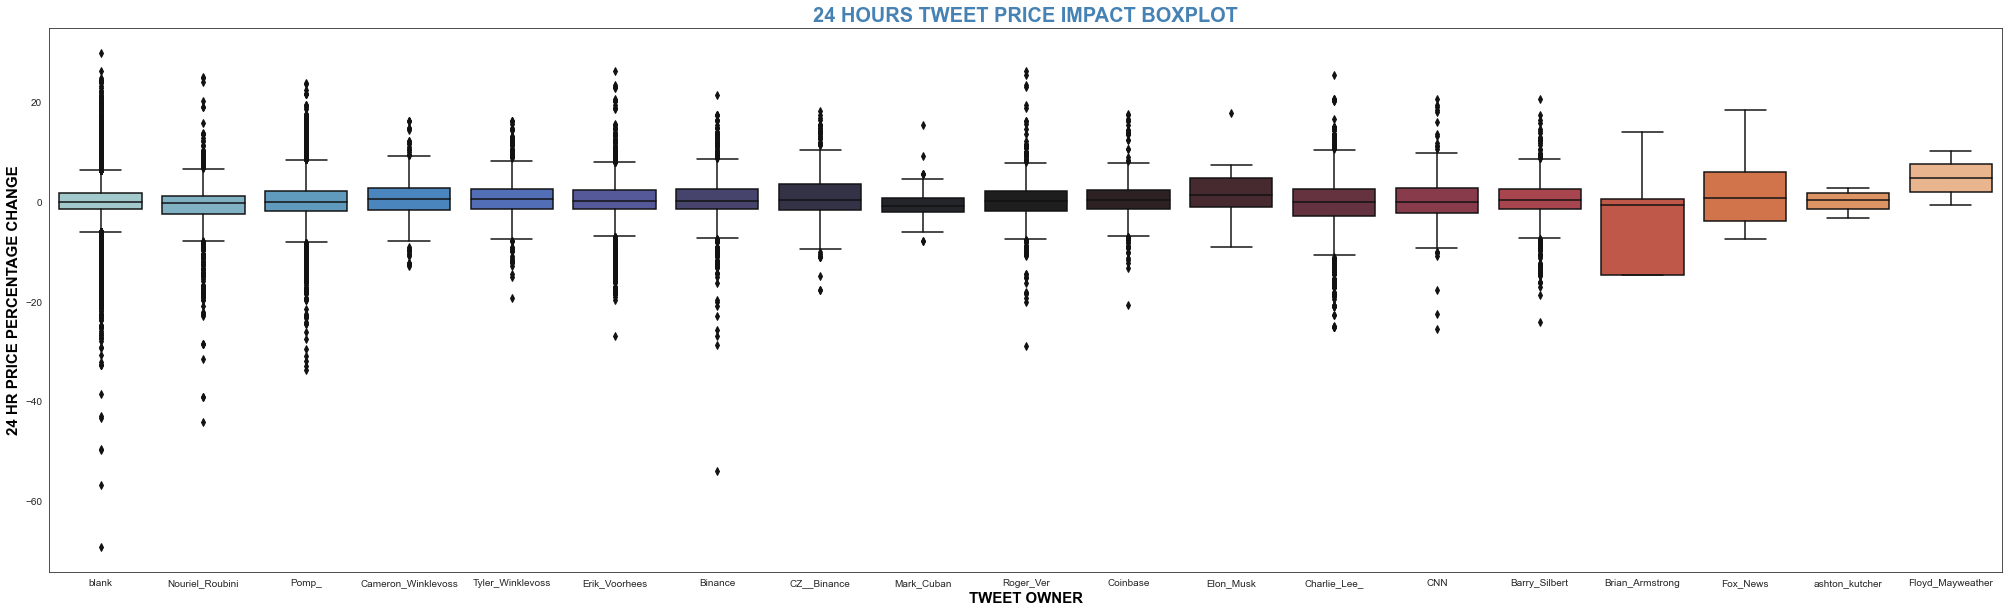

In [30]:
sns.set_style(style="white")
plt.figure(figsize = (35,10))
plt.title('24 HOURS TWEET PRICE IMPACT BOXPLOT',
             fontdict = {'fontsize':20,'fontweight':'bold','color':'steelblue'})
ax = sns.boxplot(x="name", y="24hr_change", data=merge_df,palette="icefire")
plt.xlabel('TWEET OWNER',
          fontdict = {'fontsize':15,'fontweight':'bold','color':'black'})
plt.ylabel('24 HR PRICE PERCENTAGE CHANGE',
          fontdict = {'fontsize':15,'fontweight':'bold','color':'black'})

plt.show()

In [31]:
@interact
def impactful_tweet(i=(0,len(merge_df[merge_df['24hr_change']>10].copy())-1)):
    df = merge_df[merge_df['24hr_change']>10]
    df.reset_index(inplace=True)
    percentage = round(df['24hr_change'][i],1)
    print('Date:',df['Date'][i],end='\n\n')
    print('Tweet:',df['tweet'][i],end='\n\n')
    print('Tweet Owner:',df['name'][i],end='\n\n')
    print('Price percentage change 24 hours after tweet:',f'{percentage}%', end = '\n\n')


interactive(children=(IntSlider(value=508, description='i', max=1017), Output()), _dom_classes=('widget-intera…

In [32]:
@interact
def negative_tweet(i=(0,len(merge_df[merge_df['24hr_change']<-10])-1)):
    df = merge_df[merge_df['24hr_change']<-10]
    df.reset_index(inplace=True)
    percentage = round(df['24hr_change'][i],1)
    print('Date:',df['Date'][i],end='\n\n')
    print('Tweet:',df['tweet'][i],end='\n\n')
    print('Tweet Owner:',df['name'][i],end='\n\n')
    print('Price percentage change 24 hours after tweet:',f'{percentage}%', end = '\n\n')

interactive(children=(IntSlider(value=680, description='i', max=1361), Output()), _dom_classes=('widget-intera…

In [33]:
name_list = list(merge_df['name'].unique())

In [34]:
@interact
def most_used_words(i=(1,17)):
    sns.set_style(style="whitegrid")
    name_list = list(merge_df['name'].unique())
    from collections import Counter
    common_df = merge_df[merge_df['name']==name_list[i]]
    common_corpus = common_df['tweet'].to_list()
    common_tokens = word_tokenize(','.join(common_corpus))
    common_stopped_tokens = [w.lower() for w in common_tokens if w.lower() not in stopwords_list]
    Counter = Counter(common_stopped_tokens)
    word_dict = {}
    
    for t in Counter.most_common(10):
        word_dict[t[0]] = t[1]

    plt.figure(figsize = (13,7))
    plt.title(f'10 MOST COMMON WORDS TWEETED BY {name_list[i].upper()}',
             fontdict = {'fontsize':20,'fontweight':'bold','color':'steelblue'})
    plt.xlabel('FREQUENCY',
              fontdict = {'fontsize':15,'fontweight':'bold','color':'black'})
    plt.ylabel('WORD',
              fontdict = {'fontsize':15,'fontweight':'bold','color':'black'})
    ax = sns.barplot(x=list(word_dict.keys()), y=[float(x) for x in word_dict.values()],
                    palette="icefire")


interactive(children=(IntSlider(value=9, description='i', max=17, min=1), Output()), _dom_classes=('widget-int…

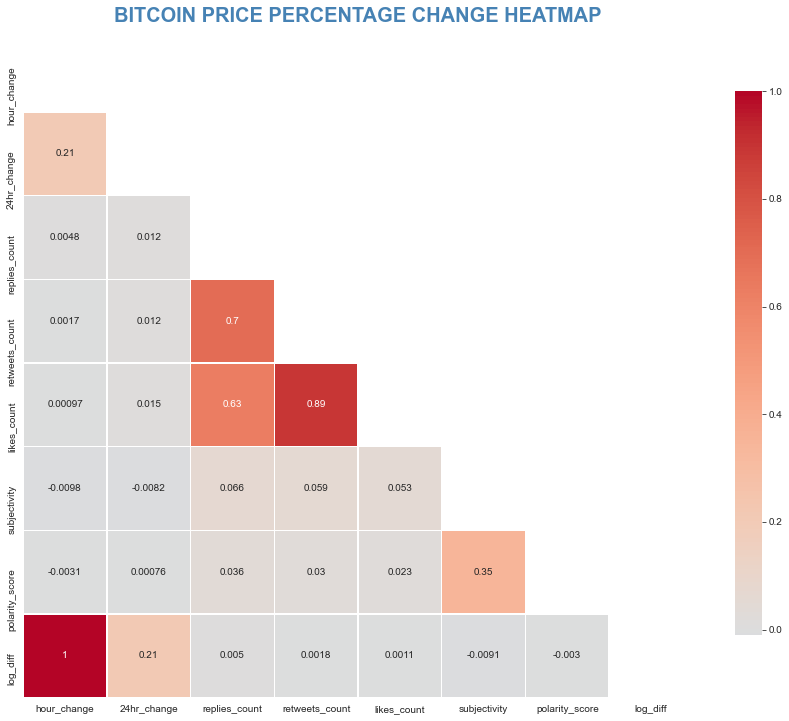

In [35]:
sns.set_style(style="white")
columns = ['hour_change', '24hr_change','replies_count',
           'retweets_count', 'likes_count','subjectivity',
           'polarity_score','log_diff']
heat = merge_df[columns]

#CORRELATION HEATMAP
corr = heat.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

ax = plt.subplots(figsize=(15, 20))

sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1, center=0,
            square=True, linewidths=.5,annot=True, cbar_kws={"shrink": .5});

plt.title('BITCOIN PRICE PERCENTAGE CHANGE HEATMAP',
             fontdict = {'fontsize':20,'fontweight':'bold','color':'steelblue'})

plt.show()

In [36]:
for name in name_list:
    name_df = merge_df[merge_df['name'] == name]
    describe_df = pd.DataFrame(name_df['24hr_change'].describe()).rename(columns ={'24hr_change':name})
    try:
        describe_df_2 = pd.concat([describe_df_2,describe_df],axis=1)
    except:
        describe_df_2 = describe_df
        
describe_df_2

hour_change   24hr_change      log_diff   hour_change   24hr_change  \
count  47432.000000  47432.000000  47432.000000  47432.000000  47432.000000   
mean       0.007150      0.178964      0.000112      0.007150      0.178964   
std        0.898188      4.253276      0.008949      0.898188      4.253276   
min      -22.756000    -69.125000     -0.205030    -22.756000    -69.125000   
25%       -0.225000     -1.304000     -0.002246     -0.225000     -1.304000   
50%        0.000000      0.216000      0.000000      0.000000      0.216000   
75%        0.265000      1.970000      0.002658      0.265000      1.970000   
max       16.767000     30.044000      0.183521     16.767000     30.044000   

           log_diff         blank  Nouriel_Roubini        Pomp_  \
count  47432.000000  36465.000000      1152.000000  5656.000000   
mean       0.000112      0.164315        -0.964701     0.217459   
std        0.008949      4.048777         6.142116     5.026170   
min       -0.205030    -69.125000       -43.987000   -33.528000   
25%       -0.002246     -1.239000        -2.229500    -1.749000   
50%        0.000000      0.208000        -0.139000     0.170000   
75%        0.002658      1.852000         1.370000     2.420000   
max        0.183521     30.044000        25.245000    24.081000   

       Cameron_Winklevoss  ...   Roger_Ver    Coinbase  Elon_Musk  \
count          443.000000  ...  776.000000  426.000000  29.000000   
mean             0.820822  ...    0.370112    0.755620   1.711241   
std              4.558759  ...    4.868304    4.848094   4.943590   
min            -12.641000  ...  -28.699000  -20.549000  -8.849000   
25%             -1.417500  ...   -1.595000   -1.229500  -0.969000   
50%              0.753000  ...    0.245000    0.441000   1.527000   
75%              2.901000  ...    2.256750    2.483750   5.012000   
max             16.396000  ...   26.376000   17.835000  17.929000   

       Charlie_Lee_         CNN  Barry_Silbert  Brian_Armstrong   Fox_News  \
count   2015.000000  244.000000     799.000000        49.000000  17.000000   
mean      -0.389568    0.539656       0.435000        -4.044857   2.107765   
std        5.840092    5.689881       4.773647         7.734596   7.169689   
min      -24.945000  -25.347000     -23.883000       -14.616000  -7.394000   
25%       -2.766000   -2.016500      -1.192000       -14.616000  -3.614000   
50%        0.165000    0.116000       0.581000        -0.417000   0.968000   
75%        2.656000    2.875500       2.781500         0.822000   6.081000   
max       25.568000   20.873000      20.854000        14.212000  18.577000   

       ashton_kutcher  Floyd_Mayweather  
count        4.000000          2.000000  
mean         0.235750          4.926000  
std          2.634975          7.756961  
min         -3.021000         -0.559000  
25%         -1.239750          2.183500  
50%          0.497500          4.926000  
75%          1.973000          7.668500  
max          2.969000         10.411000  

[8 rows x 25 columns]

In [37]:
for i in range(0,len(merge_df)):
    if (merge_df['24hr_change'][i] <-5) or (merge_df['24hr_change'][i] > 5):
        merge_df['24hr_change'][i] = None
        merge_df.fillna('Impactful',inplace=True)
    else:
        merge_df['24hr_change'][i] = None
        merge_df.fillna('Neutral',inplace=True)
        
        
#     if merge_df['24hr_change'][i] <= -3:
#         merge_df['24hr_change'][i] = None
#         merge_df.fillna('High Neg',inplace=True)
        
#     elif merge_df['24hr_change'][i] >= 3:
#         merge_df['24hr_change'][i] = None
#         merge_df.fillna('High Pos',inplace=True)
        
#     elif merge_df['24hr_change'][i] > -3 and merge_df['24hr_change'][i] <3:
#         merge_df['24hr_change'][i] = None
#         merge_df.fillna('Neutral',inplace=True)
        
#     elif merge_df['Change %'][i] < 0.25 and merge_df['Change %'][i] >= 0:
#         merge_df['Change %'][i] = None
#         merge_df.fillna('Pos',inplace=True) 
        
merge_df

Date  hour_change 24hr_change  log_diff  \
0     2021-03-07 00:00:00        0.405     Neutral  0.004062   
1     2021-03-06 23:00:00       -0.176     Neutral -0.001758   
2     2021-03-06 22:00:00        0.787     Neutral  0.007904   
3     2021-03-06 21:00:00        0.017     Neutral  0.000170   
4     2021-03-06 20:00:00        0.371     Neutral  0.003718   
...                   ...          ...         ...       ...   
54088 2015-10-08 17:00:00        0.302     Neutral  0.003025   
54089 2015-10-08 17:00:00        0.302     Neutral  0.003025   
54090 2015-10-08 16:00:00       -0.274     Neutral -0.002739   
54091 2015-10-08 15:00:00       -0.033     Neutral -0.000327   
54092 2015-10-08 14:00:00        0.000     Neutral  0.000000   

                                                   tweet              name  \
0                                                  blank             blank   
1      Holly Black: If you care about the planet you ...   Nouriel_Roubini   
2                                                  blank             blank   
3      Lol USDX (what you are talking about in prior ...             Pomp_   
4                                                  blank             blank   
...                                                  ...               ...   
54088  My dad was a professor of actuarial science at...  Tyler_Winklevoss   
54089  Fed Chair: Bitcoin's Popularity Unrelated to C...     Erik_Voorhees   
54090                                              blank             blank   
54091                                              blank             blank   
54092                                              blank             blank   

       replies_count  retweets_count  likes_count  \
0                0.0             0.0          0.0   
1               97.0            62.0        223.0   
2                0.0             0.0          0.0   
3                3.0             1.0          6.0   
4                0.0             0.0          0.0   
...              ...             ...          ...   
54088            3.0            11.0         18.0   
54089            1.0             5.0          2.0   
54090            0.0             0.0          0.0   
54091            0.0             0.0          0.0   
54092            0.0             0.0          0.0   

                                              stem_tweet  tweet_length  \
0                                                  blank           0.0   
1                            holli black care planet buy           6.0   
2                                                  blank           0.0   
3      lol usdx talk prior tweet stabl rel comparison...          27.0   
4                                                  blank           0.0   
...                                                  ...           ...   
54088  dad professor actuari scienc wharton obviou futur           8.0   
54089  fed chair popular unrel central bank polici fi...          13.0   
54090                                              blank           0.0   
54091                                              blank           0.0   
54092                                              blank           0.0   

       subjectivity  polarity  polarity_score  
0          0.000000     blank        0.000000  
1          0.433333  Positive       -0.166667  
2          0.000000     blank        0.000000  
3          0.400000  Positive        0.425000  
4          0.000000     blank        0.000000  
...             ...       ...             ...  
54088      0.000000   Neutral        0.000000  
54089      0.575000  Positive        0.300000  
54090      0.000000     blank        0.000000  
54091      0.000000     blank        0.000000  
54092      0.000000     blank        0.000000  

[54093 rows x 14 columns]

In [38]:
merge_df['24hr_change'].value_counts(normalize=True)

Neutral      0.826207
Impactful    0.173793
Name: 24hr_change, dtype: float64

In [39]:
# for i in range(0,len(merge_df)):
#     if (merge_df['log_diff'][i] <-0.009) or (merge_df['log_diff'][i] > 0.009):
#         merge_df['log_diff'][i] = None
#         merge_df.fillna('Impactful',inplace=True)
#     else:
#         merge_df['log_diff'][i] = None
#         merge_df.fillna('Neutral',inplace=True)
#     if merge_df['log_diff'][i] <= -0.01:
#         merge_df['log_diff'][i] = None
#         merge_df.fillna('High Neg',inplace=True)
        
#     elif merge_df['log_diff'][i] >= 0.01:
#         merge_df['log_diff'][i] = None
#         merge_df.fillna('High Pos',inplace=True)
        
#     elif merge_df['log_diff'][i] > -0.01 and merge_df['log_diff'][i] <0.01:
#         merge_df['log_diff'][i] = None
#         merge_df.fillna('Neutral',inplace=True)

In [40]:
merge_df['log_diff'].value_counts(normalize=True)

 0.000000    0.048694
-0.002670    0.000351
-0.002915    0.000333
 0.002374    0.000277
-0.003348    0.000277
               ...   
 0.005400    0.000018
 0.005336    0.000018
 0.002021    0.000018
-0.000772    0.000018
-0.002192    0.000018
Name: log_diff, Length: 44745, dtype: float64

### Word Cloud

In [41]:
from collections import Counter
#CREATING CORPUS WITH ALL TEXT IN DESCRIPTION COLUMN
corpus = df_tweet['tweet'].to_list()

#TOKENIZING TEXT
tokens = word_tokenize(','.join(corpus))
Counter = Counter(tokens)
print(Counter.most_common(4))



[(',', 35541), ('.', 18134), ('the', 15370), ('Bitcoin', 12545)]


In [42]:
def word_cloud(corpus,stopwords_list,name):
    #TOKENIZING TEXT
    tokens = word_tokenize(','.join(corpus))

    twitter_logo = np.array(Image.open('./images/twitter_logo.png'))

    wordcloud = WordCloud(stopwords=stopwords_list,
                          collocations=False,
                         background_color = 'white',
                         mask=twitter_logo,
                          contour_width=5,
                          contour_color='dodgerblue')

    #GENERATE WORD CLOUD
    wordcloud.generate(','.join(tokens))

    #STORE TO FILE
    wordcloud.to_file(f'./images/bitcoin{name}.png')

    #CREATE COLORING FROM IMAGE
    image_colors = ImageColorGenerator(twitter_logo)


    #PLOTTING
    plt.figure(figsize = (12, 12), facecolor = None) 
    plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
    plt.axis("off")
    plt.title(f'{name} BITCOIN WORDCLOUD',fontdict = {'fontsize':25,'fontweight':'bold','color':'dodgerblue'})


    plt.show()
    

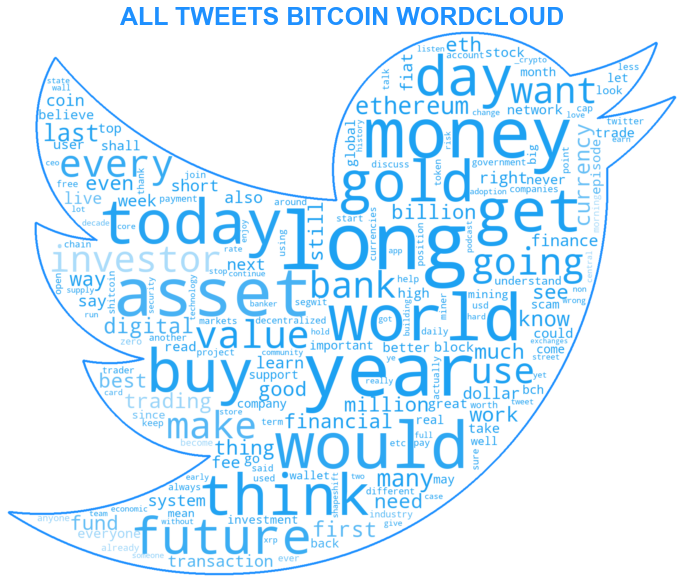

In [43]:
corpus = merge_df['tweet'].str.lower().to_list()
word_cloud(corpus,stopwords_list,'ALL TWEETS')

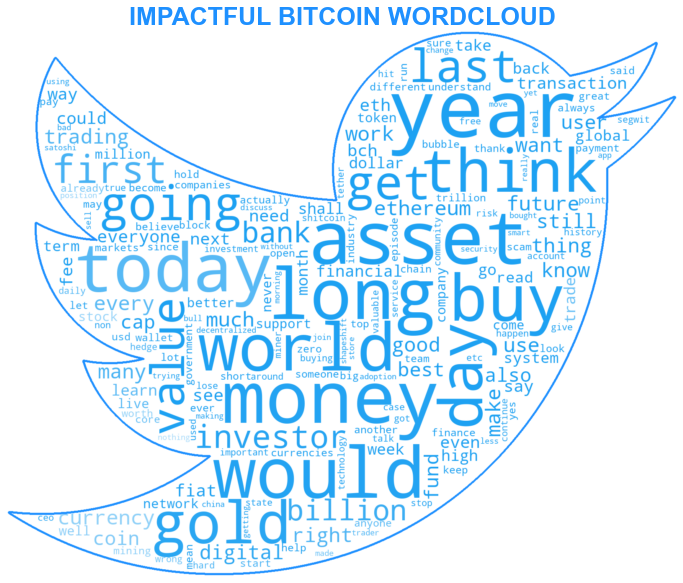

In [44]:
#CREATING CORPUS WITH ONLY IMPACTFUL TWEETS
df_imp = merge_df[merge_df['24hr_change'] == 'Impactful']
corpus = df_imp['tweet'].str.lower().to_list()
word_cloud(corpus,stopwords_list,'IMPACTFUL')

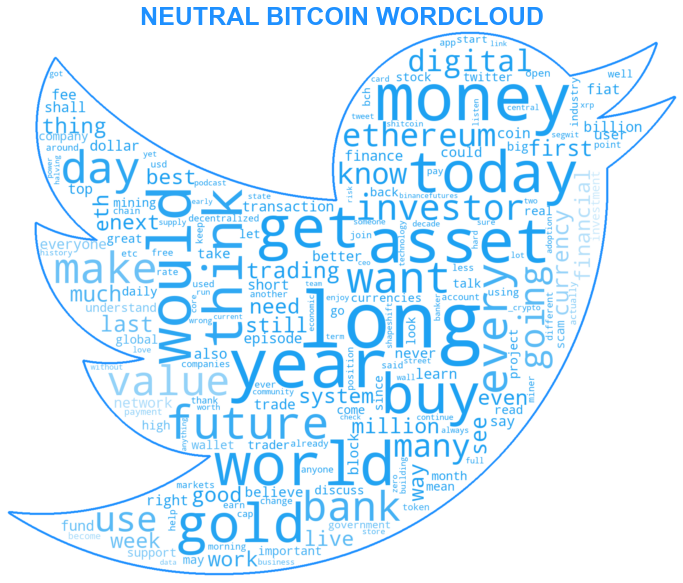

In [45]:
#CREATING CORPUS WITH ONLY IMPACTFUL TWEETS
df_neu = merge_df[merge_df['24hr_change'] == 'Neutral']
corpus = df_neu['tweet'].str.lower().to_list()
word_cloud(corpus,stopwords_list,'NEUTRAL')

# MODEL

## Creating Function to Evaluate Random Forest Model

In [46]:
#CREATING FUNCTION TO EVALUATE MODELS

def model_eval(model,X_train,y_train,X_test,y_test,classes=None,
                           normalize='true',cmap='Blues',label=''):

#         """Function with PEP 484 type annotations.

#         Args:
#             model: The Model Classifier.
#             X_train: X_train being used to fit model (could be scaled or not).
#             y_train: y_train being used to fit model and to get train accuracy.
#             X_test: X_test to get test predictions.
#             y_test: y_test used to get test accuracy
#             classes: Class labels
#             normalize: set to true
#             cmap: Color scheme for Confusion Matrix. Set to Blues
#             label: Confusion Matrix Label

#         Returns:
#             Model Accuracy. Confusion Matrix, ROC Curve, and best params for GridSearch

#         """
    
    
    #FITTING MODEL WITH TRAIN DATA
    model.fit(X_train,y_train)   
      
    #GETTING TRAIN PREDICTIONS
    y_hat_train = model.predict(X_train)
    
    #GETING TEST PREDICTIONS
    y_hat_test = model.predict(X_test)
    
    dashes = '---'*20
    
    if isinstance(model,GridSearchCV):
        grid_header = "GRID SEARCH FOUND THE FOLLOWING OPTIMAL PARAMETERS: "
        print(dashes,grid_header,dashes,sep='\n')
        best_parameters = model.best_params_
        for param_name in sorted(best_parameters.keys()):
            print("%s: %r" % (param_name, best_parameters[param_name]))
    
    #GETTING ACCURACY SCORE FOR TRAIN AND TEST
    
    if len(label)>0:
        accuracy_header = f'{label} ACCURACY'
    else:
        accuracy_header = 'MODEL ACCURACY'
    print(dashes,accuracy_header,dashes,sep='\n')
    training_accuracy = accuracy_score(y_train, y_hat_train)
    testing_accuracy = accuracy_score(y_test, y_hat_test)
    
    print(f'TRAINING ACCURACY: {round(training_accuracy*100,2)}%')
    print(f'TESTING ACCURACY: {round(testing_accuracy*100,2)}%')
          
    #CLASSIFICATION REPORT AND SCORES
    test_header = "CLASSIFICATION REPORT"
    
    #ADDING LABEL IF GIVEN
    if len(label)>0:
        test_header += f" USING {label}"
    
    # PRINT CLASSIFICATION REPORT
    
    print(dashes,test_header,dashes,sep='\n')

    print(metrics.classification_report(y_test,y_hat_test,
                                    target_names=classes))

    print(dashes+"\n\n")
    
    

    # MAKE FIGURE
    fig, axes = plt.subplots(figsize=(6,6),ncols=1)
   

    # PLOTTING CONFUSION MATRIX 
    if isinstance(model,GridSearchCV):
        metrics.plot_confusion_matrix(model.best_estimator_, X_test,y_test,
                                      display_labels=classes,
                                      normalize=normalize,
                                     cmap=cmap,ax=axes,xticks_rotation=45)
        axes.set(title='Confusion Matrix')
    else:
        metrics.plot_confusion_matrix(model, X_test,y_test,
                                      display_labels=classes,
                                      normalize=normalize,
                                     cmap=cmap,ax=axes,xticks_rotation=45)
        axes.set(title='Confusion Matrix')
    
    fig.tight_layout()
    plt.show()   

## Random Forest Model Using Engineered Columns

In [47]:
#CREATING CLASS WEIGHTS TO BE USED IN  MODEL
weights_names = compute_class_weight('balanced',np.unique(merge_df['name']),merge_df['name'])

weights_names_dict = dict(zip(np.unique(merge_df['name']),weights_names))
weights_names_dict

merge_df['name_weight'] = merge_df['name'].map(lambda x: weights_names_dict[x])

In [48]:
y = merge_df['24hr_change'].copy()
X_columns = ['name','polarity']
X=merge_df[X_columns].copy()
X = pd.get_dummies(X)
X = pd.concat([X,merge_df['subjectivity']],axis=1)
X = pd.concat([X,merge_df['name_weight']],axis=1)
X = pd.concat([X,merge_df['replies_count']],axis=1)
X = pd.concat([X,merge_df['retweets_count']],axis=1)
X = pd.concat([X,merge_df['likes_count']],axis=1)
X = pd.concat([X,merge_df['tweet_length']],axis=1)

X

name_Barry_Silbert  name_Binance  name_Brian_Armstrong  name_CNN  \
0                       0             0                     0         0   
1                       0             0                     0         0   
2                       0             0                     0         0   
3                       0             0                     0         0   
4                       0             0                     0         0   
...                   ...           ...                   ...       ...   
54088                   0             0                     0         0   
54089                   0             0                     0         0   
54090                   0             0                     0         0   
54091                   0             0                     0         0   
54092                   0             0                     0         0   

       name_CZ__Binance  name_Cameron_Winklevoss  name_Charlie_Lee_  \
0                     0                        0                  0   
1                     0                        0                  0   
2                     0                        0                  0   
3                     0                        0                  0   
4                     0                        0                  0   
...                 ...                      ...                ...   
54088                 0                        0                  0   
54089                 0                        0                  0   
54090                 0                        0                  0   
54091                 0                        0                  0   
54092                 0                        0                  0   

       name_Coinbase  name_Elon_Musk  name_Erik_Voorhees  ...  \
0                  0               0                   0  ...   
1                  0               0                   0  ...   
2                  0               0                   0  ...   
3                  0               0                   0  ...   
4                  0               0                   0  ...   
...              ...             ...                 ...  ...   
54088              0               0                   0  ...   
54089              0               0                   1  ...   
54090              0               0                   0  ...   
54091              0               0                   0  ...   
54092              0               0                   0  ...   

       polarity_Negative  polarity_Neutral  polarity_Positive  polarity_blank  \
0                      0                 0                  0               1   
1                      0                 0                  1               0   
2                      0                 0                  0               1   
3                      0                 0                  1               0   
4                      0                 0                  0               1   
...                  ...               ...                ...             ...   
54088                  0                 1                  0               0   
54089                  0                 0                  1               0   
54090                  0                 0                  0               1   
54091                  0                 0                  0               1   
54092                  0                 0                  0               1   

       subjectivity  name_weight  replies_count  retweets_count  likes_count  \
0          0.000000     0.078075            0.0             0.0          0.0   
1          0.433333     2.471354           97.0            62.0        223.0   
2          0.000000     0.078075            0.0             0.0          0.0   
3          0.400000     0.503359            3.0             1.0          6.0   
4          0.000000     0.078075            0.0             0.0          0.0   
...             ...

In [49]:
y.value_counts(True)

Neutral      0.826207
Impactful    0.173793
Name: 24hr_change, dtype: float64

In [50]:
#TRAIN TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1,
                                                    random_state=69)

In [51]:
# CHECKING Y_TRAIN AND Y_TEST VALUE COUNTS TO SEE IF IT MATCHES THE DF DISTRIBUTION

print(f'y_train value counts: \n {y_train.value_counts(normalize = True)}')
print('\n')
print(f'y_test value counts: \n {y_test.value_counts(normalize = True)}')

y_train value counts: 
 Neutral      0.826264
Impactful    0.173736
Name: 24hr_change, dtype: float64


y_test value counts: 
 Neutral      0.825693
Impactful    0.174307
Name: 24hr_change, dtype: float64


In [52]:
#INITIALIZING CLASSIFIER
rf = RandomForestClassifier(class_weight='balanced',
                            max_depth=10,
                            n_estimators=250)

------------------------------------------------------------
MODEL ACCURACY
------------------------------------------------------------
TRAINING ACCURACY: 70.55%
TESTING ACCURACY: 69.0%
------------------------------------------------------------
CLASSIFICATION REPORT
------------------------------------------------------------
              precision    recall  f1-score   support

   Impactful       0.24      0.35      0.28       943
     Neutral       0.85      0.76      0.80      4467

    accuracy                           0.69      5410
   macro avg       0.54      0.56      0.54      5410
weighted avg       0.74      0.69      0.71      5410

------------------------------------------------------------




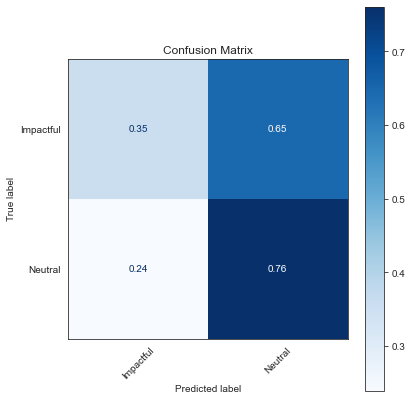

In [53]:
#EVALUATING MODEL USING FUNCTION
model_eval(rf,X_train,y_train,X_test,y_test)

## Naive Bayes Model Using only Tweet Texts

In [54]:
y = merge_df['24hr_change'].copy()
X = merge_df['name'] + ' ' + merge_df['stem_tweet'].copy()

In [55]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1,
                                                 random_state=69)

In [56]:
#MAKE TFIDFVECTORIZER USING STOPWORDS_LIST
vectorizer = TfidfVectorizer(tokenizer = word_tokenize,stop_words=stopwords_list)

# VECTORIZE DATA AND MAKE X_train_tfidf and X_test_tfidf
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)
X_train_tfidf

<48683x14383 sparse matrix of type '<class 'numpy.float64'>'
	with 184676 stored elements in Compressed Sparse Row format>

In [57]:
#CHECKING LENGTH OF VECTORIZER VOCABULARY
print (len(vectorizer.vocabulary_))

14383


In [58]:
NB = MultinomialNB(alpha=0.1)

------------------------------------------------------------
MODEL ACCURACY
------------------------------------------------------------
TRAINING ACCURACY: 84.45%
TESTING ACCURACY: 82.61%
------------------------------------------------------------
CLASSIFICATION REPORT
------------------------------------------------------------
              precision    recall  f1-score   support

   Impactful       0.53      0.02      0.03       943
     Neutral       0.83      1.00      0.90      4467

    accuracy                           0.83      5410
   macro avg       0.68      0.51      0.47      5410
weighted avg       0.78      0.83      0.75      5410

------------------------------------------------------------




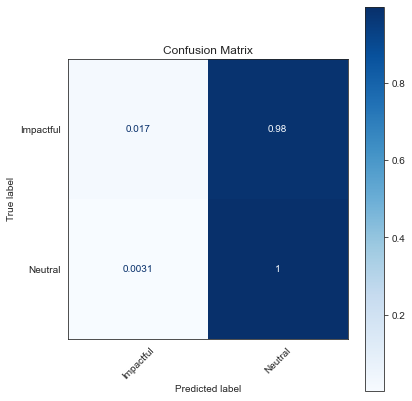

In [59]:
model_eval(NB,X_train_tfidf,y_train,X_test_tfidf,y_test)

## Random Forest Model Using only Tweet Texts

------------------------------------------------------------
MODEL ACCURACY
------------------------------------------------------------
TRAINING ACCURACY: 74.73%
TESTING ACCURACY: 71.42%
------------------------------------------------------------
CLASSIFICATION REPORT
------------------------------------------------------------
              precision    recall  f1-score   support

   Impactful       0.24      0.30      0.27       943
     Neutral       0.84      0.80      0.82      4467

    accuracy                           0.71      5410
   macro avg       0.54      0.55      0.55      5410
weighted avg       0.74      0.71      0.73      5410

------------------------------------------------------------




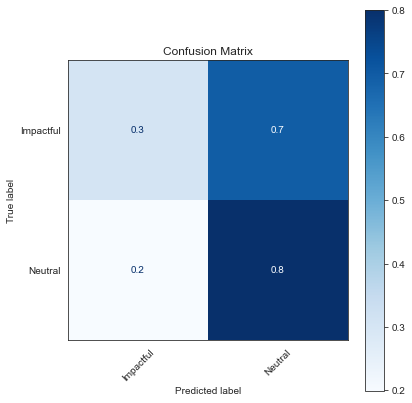

In [60]:
model_eval(rf,X_train_tfidf,y_train,X_test_tfidf,y_test)

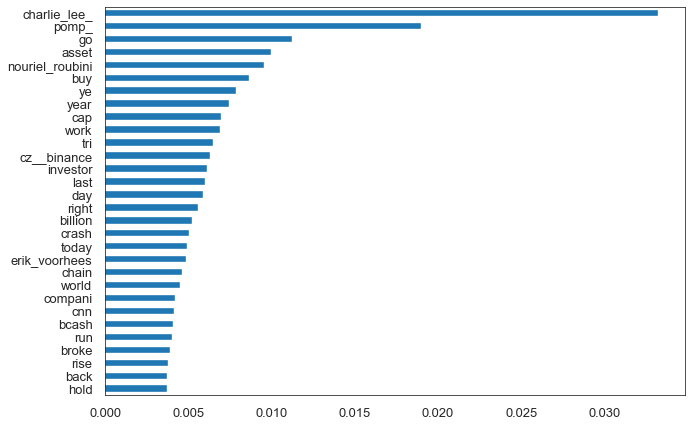

In [61]:
# PLOTTING 30 MOST IMPORTANT FEATURES
with plt.style.context('seaborn-talk'):

    #GETTING FEATURE IMPORTANCE
    importance = pd.Series(rf.feature_importances_,index=vectorizer.get_feature_names())

    # SORTING VALUES AND CREATING A BAR CHART WITH 30 MOST IMPORTANT
    importance.sort_values().tail(30).plot(kind='barh')

### Using LIME Text Explainer

In [62]:
#CREATING A PIPELINE TO GET PROBABILITIES
c = make_pipeline(vectorizer, rf)

In [63]:
@interact

def Lime(i=(0,len(X_test)-1)):
    # INITIALIZING LIME
    class_names = ['IMPACTFUL', 'NEUTRAL']
    explainer = LimeTextExplainer(class_names=class_names)
    if X_test.iloc[i] != 'blank':
        exp = explainer.explain_instance(X_test.iloc[i], c.predict_proba)

        fig = exp.as_pyplot_figure()
        exp.show_in_notebook()

interactive(children=(IntSlider(value=2704, description='i', max=5409), Output()), _dom_classes=('widget-inter…

## Deep NLP using Tweet Texts

### Deep NLP Evaluation Function

In [64]:
#CREATING MODEL EVALUATION FUNCTION FOR DEEP NLP

def model_eval_2(y_test,y_hat_test, normalize='true',cmap='Blues',label='MODEL',
                           title='Confusion matrix',classes= [0,1,2]):

#         """Function with PEP 484 type annotations.

#         Args:
#             model: The Model Classifier.
#             X_train: X_train being used to fit model (could be scaled or not).
#             y_train: y_train being used to fit model and to get train accuracy.
#             X_test: X_test to get test predictions.
#             y_test: y_test used to get test accuracy
#             classes: Class labels
#             normalize: set to true
#             cmap: Color scheme for Confusion Matrix. Set to Blues
#             label: Confusion Matrix Label

#         Returns:
#             Model Accuracy. Confusion Matrix, ROC Curve, and best params for GridSearch

#         """
    
    dashes = '---'*20

    #GETTING ACCURACY SCORE FOR TRAIN AND TEST    
    accuracy_header = f'{label} ACCURACY'
    print(dashes,accuracy_header,dashes,sep='\n')
    testing_accuracy = accuracy_score(y_test, y_hat_test)

    print(f'TESTING ACCURACY: {round(testing_accuracy*100,2)}%')


    #CLASSIFICATION REPORT AND SCORES
    test_header = f"{label} CLASSIFICATION REPORT"


    # PRINT CLASSIFICATION REPORT    
    print(dashes,test_header,dashes,sep='\n')

    print(metrics.classification_report(y_test,y_hat_test,
                                    target_names=classes))

    print(dashes+"\n\n")


    # MAKE FIGURE
    fig, axes = plt.subplots(figsize=(15,5),ncols=3)      


    # PLOTTING CONFUSION MATRIX 

    cm = confusion_matrix(y_true=y_test, y_pred=y_hat_test,normalize=normalize)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar(ax=axes[2])
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, round(cm[i, j],2),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    #PLOTTING  LOSS VS. VAL_LOSS AND ACCURACY VS. VAL_ACCURACY
    history_df = pd.DataFrame(history.history)

    loss_df = history_df[[col for col in history_df.columns if 'loss' in col]]
    loss_df = loss_df.reset_index()

    acc_df = history_df[[col for col in history_df.columns if 'acc' in col]]
    acc_df = acc_df.reset_index()

    sns.lineplot(x='index',y='val_loss',data=loss_df,marker='o',ax=axes[0],label='val_loss')
    sns.lineplot(x='index',y='loss',data=loss_df,marker='o',ax=axes[0],label='train_loss')
    axes[0].set_title('Training Loss vs. Validation Loss')
    axes[0].set_ylabel('Loss')
    axes[0].set_xlabel('Epoch')
    axes[0].legend(loc="upper right")

    sns.lineplot(x='index',y='val_accuracy',data=acc_df,marker='o',ax=axes[1],label= 'val_accuracy')
    sns.lineplot(x='index',y='accuracy',data=acc_df,marker='o',ax=axes[1],label= 'train_accuracy')
    axes[1].set_title('Training Accuracy vs. Validation Accuracy')
    axes[1].set_ylabel('Accuracy')
    axes[1].set_xlabel('Epoch')
    axes[0].legend(loc="upper right")

    fig.tight_layout()
    plt.show()



### Model

In [65]:
merge_df

Date  hour_change 24hr_change  log_diff  \
0     2021-03-07 00:00:00        0.405     Neutral  0.004062   
1     2021-03-06 23:00:00       -0.176     Neutral -0.001758   
2     2021-03-06 22:00:00        0.787     Neutral  0.007904   
3     2021-03-06 21:00:00        0.017     Neutral  0.000170   
4     2021-03-06 20:00:00        0.371     Neutral  0.003718   
...                   ...          ...         ...       ...   
54088 2015-10-08 17:00:00        0.302     Neutral  0.003025   
54089 2015-10-08 17:00:00        0.302     Neutral  0.003025   
54090 2015-10-08 16:00:00       -0.274     Neutral -0.002739   
54091 2015-10-08 15:00:00       -0.033     Neutral -0.000327   
54092 2015-10-08 14:00:00        0.000     Neutral  0.000000   

                                                   tweet              name  \
0                                                  blank             blank   
1      Holly Black: If you care about the planet you ...   Nouriel_Roubini   
2                                                  blank             blank   
3      Lol USDX (what you are talking about in prior ...             Pomp_   
4                                                  blank             blank   
...                                                  ...               ...   
54088  My dad was a professor of actuarial science at...  Tyler_Winklevoss   
54089  Fed Chair: Bitcoin's Popularity Unrelated to C...     Erik_Voorhees   
54090                                              blank             blank   
54091                                              blank             blank   
54092                                              blank             blank   

       replies_count  retweets_count  likes_count  \
0                0.0             0.0          0.0   
1               97.0            62.0        223.0   
2                0.0             0.0          0.0   
3                3.0             1.0          6.0   
4                0.0             0.0          0.0   
...              ...             ...          ...   
54088            3.0            11.0         18.0   
54089            1.0             5.0          2.0   
54090            0.0             0.0          0.0   
54091            0.0             0.0          0.0   
54092            0.0             0.0          0.0   

                                              stem_tweet  tweet_length  \
0                                                  blank           0.0   
1                            holli black care planet buy           6.0   
2                                                  blank           0.0   
3      lol usdx talk prior tweet stabl rel comparison...          27.0   
4                                                  blank           0.0   
...                                                  ...           ...   
54088  dad professor actuari scienc wharton obviou futur           8.0   
54089  fed chair popular unrel central bank polici fi...          13.0   
54090                                              blank           0.0   
54091                                              blank           0.0   
54092                                              blank           0.0   

       subjectivity  polarity  polarity_score  name_weight  
0          0.000000     blank        0.000000     0.078075  
1          0.433333  Positive       -0.166667     2.471354  
2          0.000000     blank        0.000000     0.078075  
3          0.400000  Positive        0.425000     0.503359  
4          0.000000     blank        0.000000     0.078075  
...             ...       ...             ...          ...  
54088      0.000000   Neutral        0.000000     3.235227  
54089      0.575000  Positive        0.300000     0.968367  
54090      0.000000     blank        0.000000     0.078075  
54091      0.000000     blank        0.000000     0.078075  
54092      0.000000     blank        0.000000     0.078075  

[54093 rows x 15 columns]

In [66]:
y = merge_df['24hr_change'].replace({'Neutral':0,
                          'Impactful':1})
X = merge_df['name'] + ' ' + merge_df['stem_tweet'].copy()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1,
                                                 random_state=69)

In [67]:
#CREATING CLASS WEIGHTS TO BE USED IN DEEP NLP MODEL
weights = compute_class_weight('balanced',np.unique(y_train),y_train)

weights_dict = dict(zip(np.unique(y_train),weights))
weights_dict

{0: 0.6051336233685519, 1: 2.8779262236935446}

In [68]:
#ONE HOT ENCODE
y_train_seq=to_categorical(y_train)
y_test_seq=to_categorical(y_test)

print(f'y_train shape: {y_train_seq.shape}')
y_test_seq

y_train shape: (48683, 2)


array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [69]:
#TOKENIZE TEXT
MAX_WORDS=20000
tokenizer = text.Tokenizer(num_words = MAX_WORDS)
tokenizer.fit_on_texts(X_train)
train_sequences = tokenizer.texts_to_sequences(X_train)
test_sequences = tokenizer.texts_to_sequences(X_test)

#FIND LONGEST SEQUENCE
MAX_SEQUENCE_LENGTH= max(list(map(lambda x:len(x),[*train_sequences,*test_sequences])))
MAX_SEQUENCE_LENGTH

54

In [70]:
X_train_seq = sequence.pad_sequences(train_sequences,maxlen=MAX_SEQUENCE_LENGTH)
X_test_seq = sequence.pad_sequences(test_sequences,maxlen=MAX_SEQUENCE_LENGTH)

X_train_seq

array([[   0,    0,    0, ...,   70, 2521, 1770],
       [   0,    0,    0, ...,  540,  706, 1010],
       [   0,    0,    0, ...,    0,    1,    1],
       ...,
       [   0,    0,    0, ..., 1904,  713, 2102],
       [   0,    0,    0, ...,    0,    1,    1],
       [   0,    0,    0, ...,  599, 1704, 4915]])

In [71]:
len(tokenizer.index_word)

11749

In [72]:
#GOT FROM JAMES IRVING
def get_earlystop(monitor='val_loss',patience=4, restore_best_weights=True):
    """"""""
    args = locals()
    return EarlyStopping(**args)

In [73]:
def make_model(EMBEDDING_SIZE=136):
    model=Sequential()
    
    model.add(Embedding(MAX_WORDS,EMBEDDING_SIZE))    
    model.add(LSTM(32,return_sequences=False,recurrent_dropout=0.5))
    model.add(Dropout(0.5))
    model.add(Dense(16,activation=tf.keras.layers.LeakyReLU(),
                    kernel_regularizer=regularizers.l2(0.001)))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))
    

    model.compile(loss='categorical_crossentropy',
                  optimizer='Adam',
                  metrics=['accuracy'])
    display(model.summary())
    
    return model

model = make_model()

history = model.fit(X_train_seq, y_train_seq, epochs=20,batch_size=32, 
                    validation_split = 0.1, callbacks=get_earlystop(),
                   class_weight=weights_dict,
                    workers=3)

y_hat_test = model.predict(X_test_seq).argmax(axis=1)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 136)         2720000   
_________________________________________________________________
lstm (LSTM)                  (None, 32)                21632     
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                528       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 34        
Total params: 2,742,194
Trainable params: 2,742,194
Non-trainable params: 0
______________________________________________

None

Epoch 1/20
1370/1370 [==============================] - 71s 52ms/step - loss: 0.6942 - accuracy: 0.5748 - val_loss: 0.6849 - val_accuracy: 0.6603
Epoch 2/20
1370/1370 [==============================] - 71s 52ms/step - loss: 0.6681 - accuracy: 0.7273 - val_loss: 0.6787 - val_accuracy: 0.7174
Epoch 3/20
1370/1370 [==============================] - 75s 55ms/step - loss: 0.6287 - accuracy: 0.7822 - val_loss: 0.6664 - val_accuracy: 0.7400
Epoch 4/20
1370/1370 [==============================] - 76s 56ms/step - loss: 0.5866 - accuracy: 0.8136 - val_loss: 0.7211 - val_accuracy: 0.7453
Epoch 5/20
1370/1370 [==============================] - 76s 56ms/step - loss: 0.5544 - accuracy: 0.8422 - val_loss: 0.7456 - val_accuracy: 0.7521
Epoch 6/20
1370/1370 [==============================] - 75s 55ms/step - loss: 0.5329 - accuracy: 0.8466 - val_loss: 0.7798 - val_accuracy: 0.7461
Epoch 7/20
1370/1370 [==============================] - 76s 55ms/step - loss: 0.5181 - accuracy: 0.8631 - val_loss: 0.8661 -

------------------------------------------------------------
REGULAR EMBEDDING MODEL ACCURACY
------------------------------------------------------------
TESTING ACCURACY: 76.69%
------------------------------------------------------------
REGULAR EMBEDDING MODEL CLASSIFICATION REPORT
------------------------------------------------------------
              precision    recall  f1-score   support

     Neutral       0.84      0.89      0.86      4467
   Impactful       0.28      0.21      0.24       943

    accuracy                           0.77      5410
   macro avg       0.56      0.55      0.55      5410
weighted avg       0.74      0.77      0.75      5410

------------------------------------------------------------




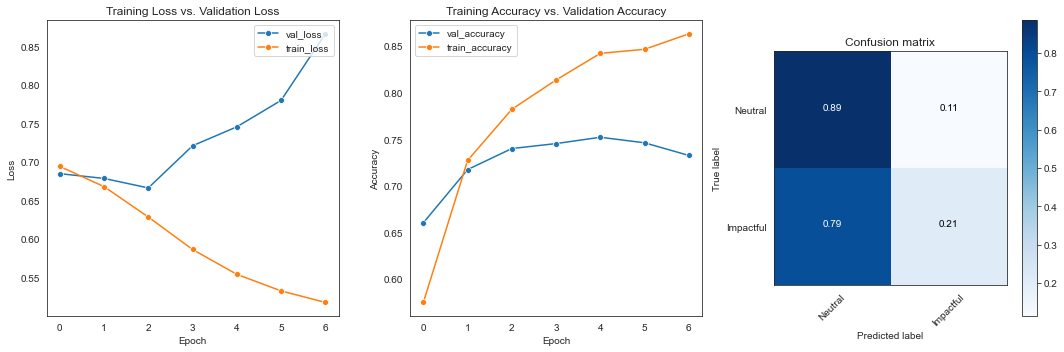

In [74]:
model_eval_2(y_test,y_hat_test,classes=['Neutral','Impactful'],
             label= 'REGULAR EMBEDDING MODEL')

# CONCLUSION & FUTURE WORK

## Conclusion

## Future Work